In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

## 1.1

In [6]:
bank = pd.read_csv(r"C:\Users\Akshay\Desktop\intro to phython\machine learning\project ml\bank_marketing_part1_Data.csv")

In [7]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [8]:
bank.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [9]:
print("The number of rows is    ", bank.shape[0])
print("The number of features is", bank.shape[1])

The number of rows is     210
The number of features is 7


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [11]:
bank.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
dups = bank.duplicated()
print("The number of duplicated rows is %d" % (dups.sum()))
bank[dups]

The number of duplicated rows is 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [13]:
np.round(bank.describe(),3)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000,210.000,210.000,210.000,210.000,210.000,210.000
mean,14.848,14.559,0.871,5.629,3.259,3.700,5.408
std,2.910,1.306,0.024,0.443,0.378,1.504,0.491
min,10.590,12.410,0.808,4.899,2.630,0.765,4.519
25%,12.270,13.450,0.857,5.262,2.944,2.562,5.045
50%,14.355,14.320,0.873,5.524,3.237,3.599,5.223
75%,17.305,15.715,0.888,5.980,3.562,4.769,5.877
max,21.180,17.250,0.918,6.675,4.033,8.456,6.550


##### Univariate Analysis

spending
Skew -  0.4


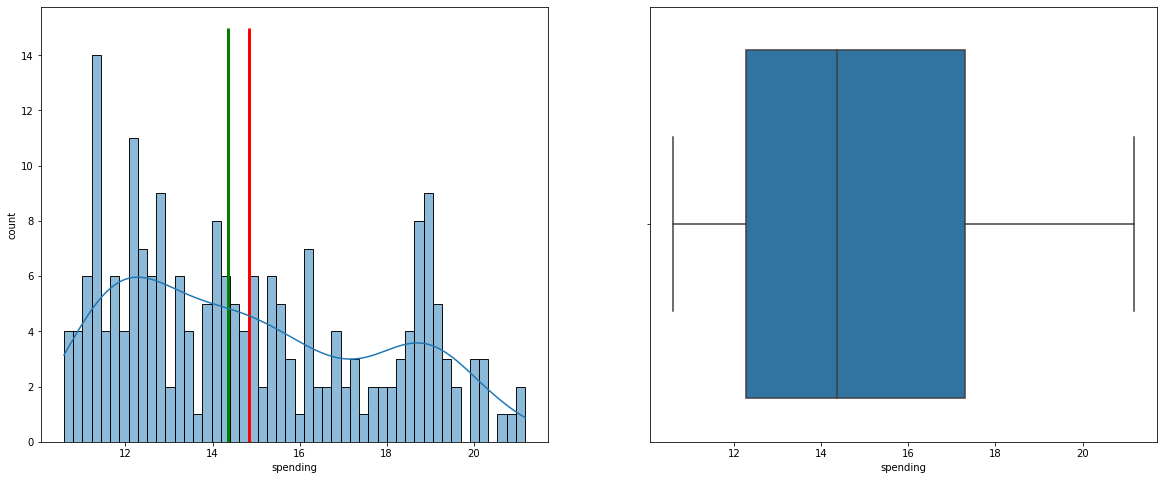

advance_payments
Skew -  0.387


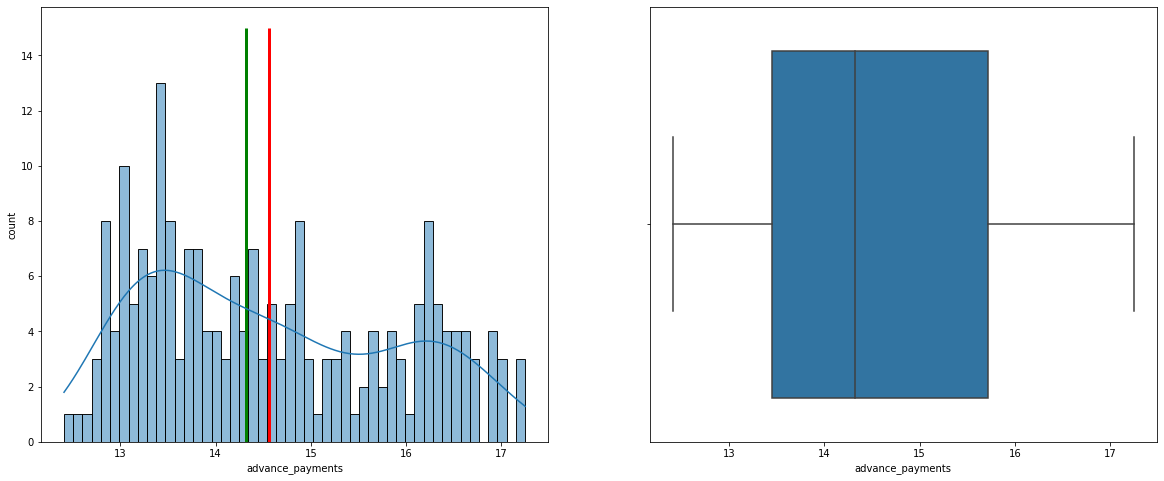

probability_of_full_payment
Skew -  -0.538


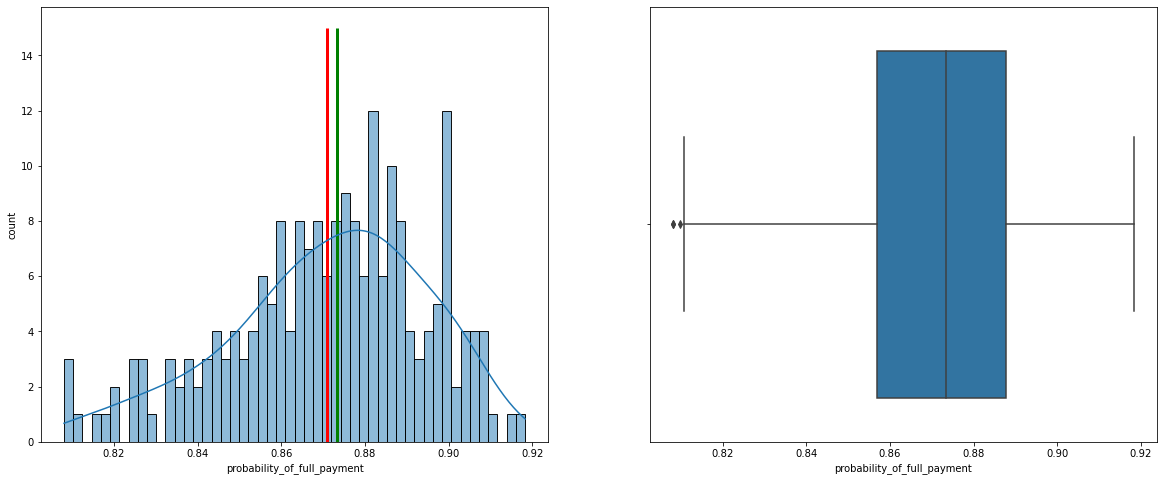

current_balance
Skew -  0.525


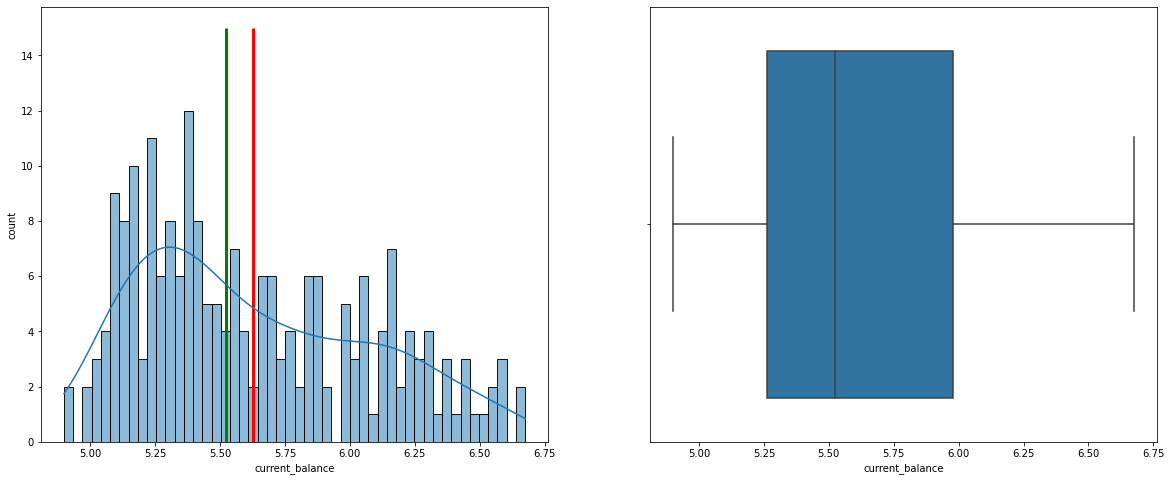

credit_limit
Skew -  0.134


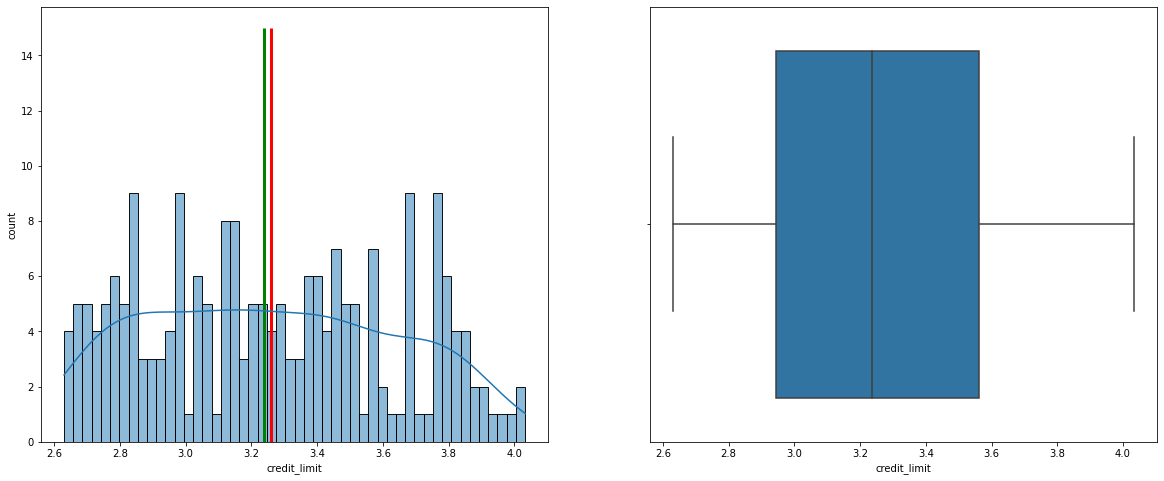

min_payment_amt
Skew -  0.402


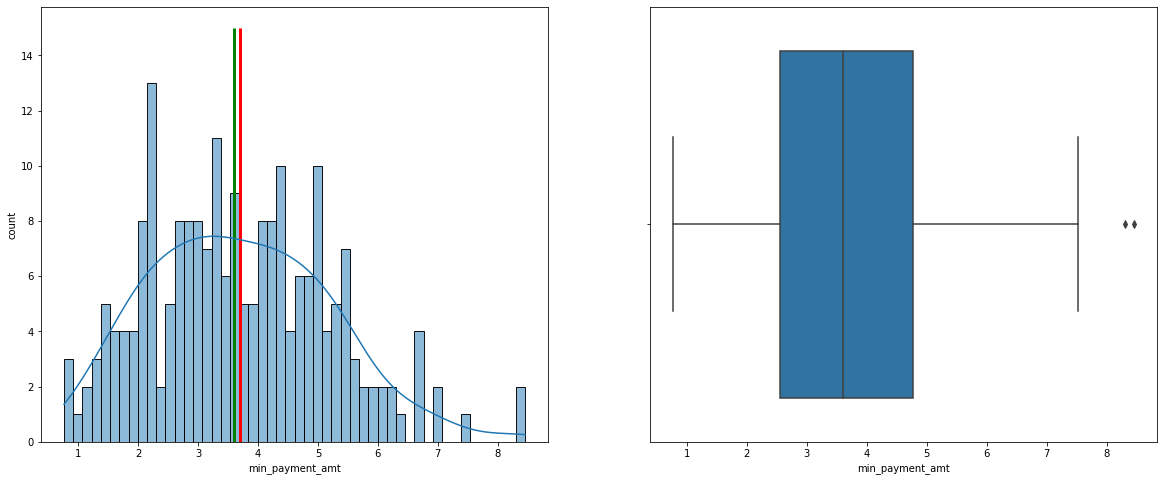

max_spent_in_single_shopping
Skew -  0.562


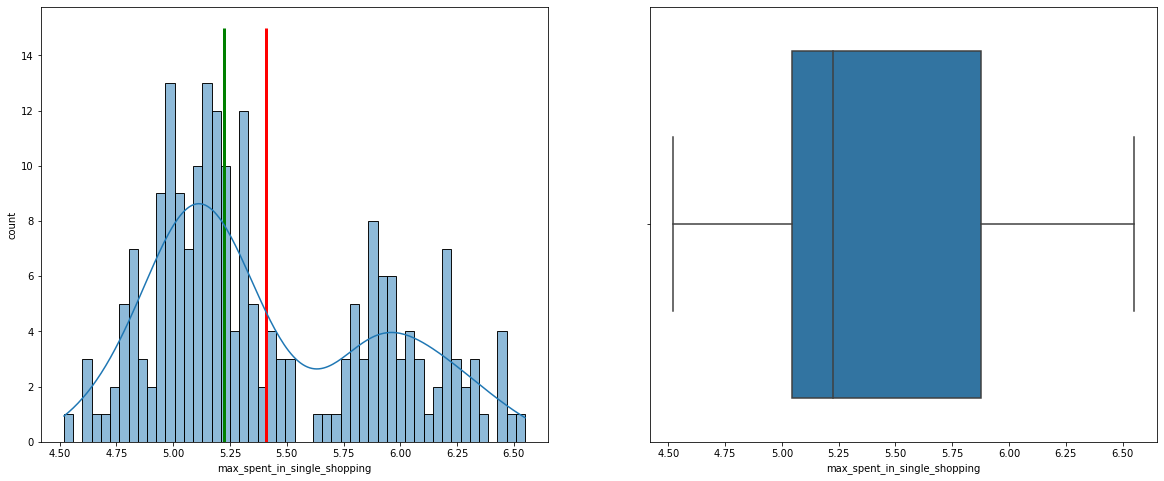

In [14]:
count_cols = list(bank.columns)
for col in count_cols:
    print(col)
    print('Skew - ', np.round(bank[col].skew(),3))
    plot.figure(figsize=(20,8))
    plot.subplot(1,2,1)
    sns.histplot(data = bank[col], bins = 50, kde = True)
    plot.vlines(bank[col].mean(), ymin = 0, ymax = 15, color = 'red', linewidth = 3)
    plot.vlines(bank[col].median(), ymin = 0, ymax = 15, color = 'green', linewidth = 3)
    plot.ylabel('count')
    plot.subplot(1,2,2)
    sns.boxplot(bank[col])
    plot.show()

##### Bi-variate Analysis

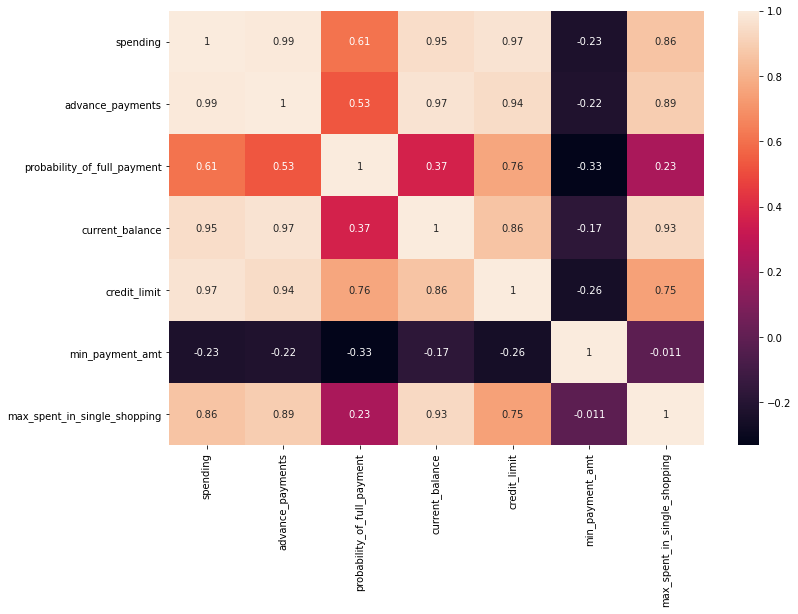

In [15]:
plot.figure(figsize=(12,8))
sns.heatmap(data = bank.corr(), annot = True)
plot.show()

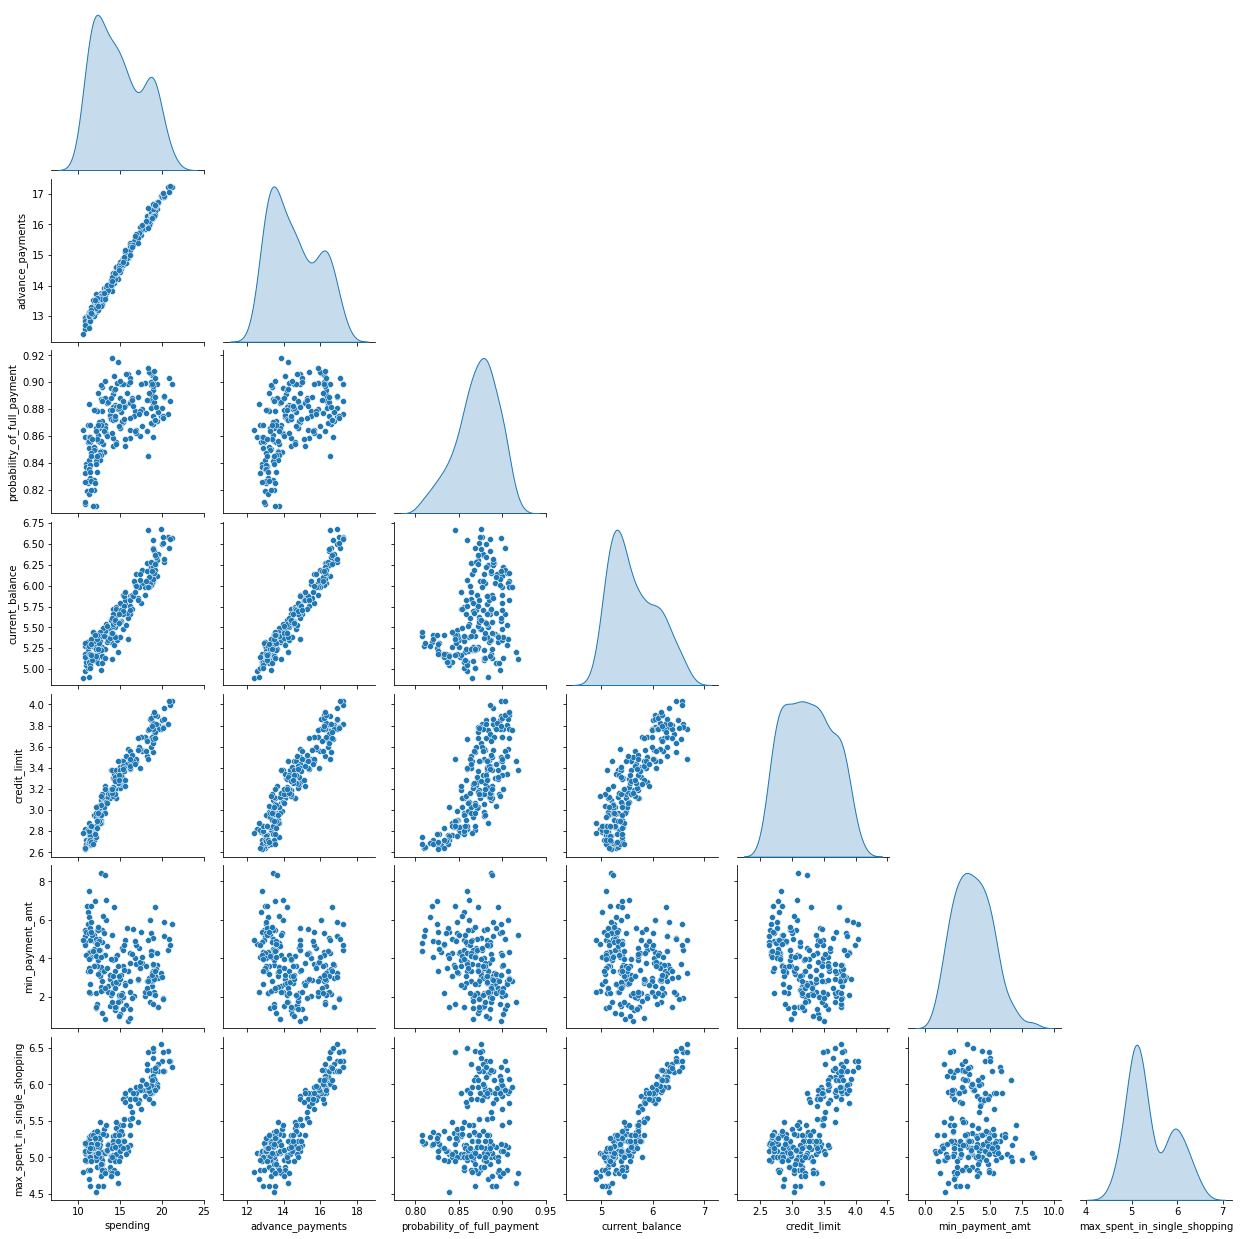

In [16]:
sns.pairplot(data = bank, corner = True, diag_kind = 'kde')

In [17]:
from scipy.stats import zscore

In [18]:
bank_scaled = bank.apply(zscore)
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


#### 1.3

In [19]:
import scipy.cluster.hierarchy as shc

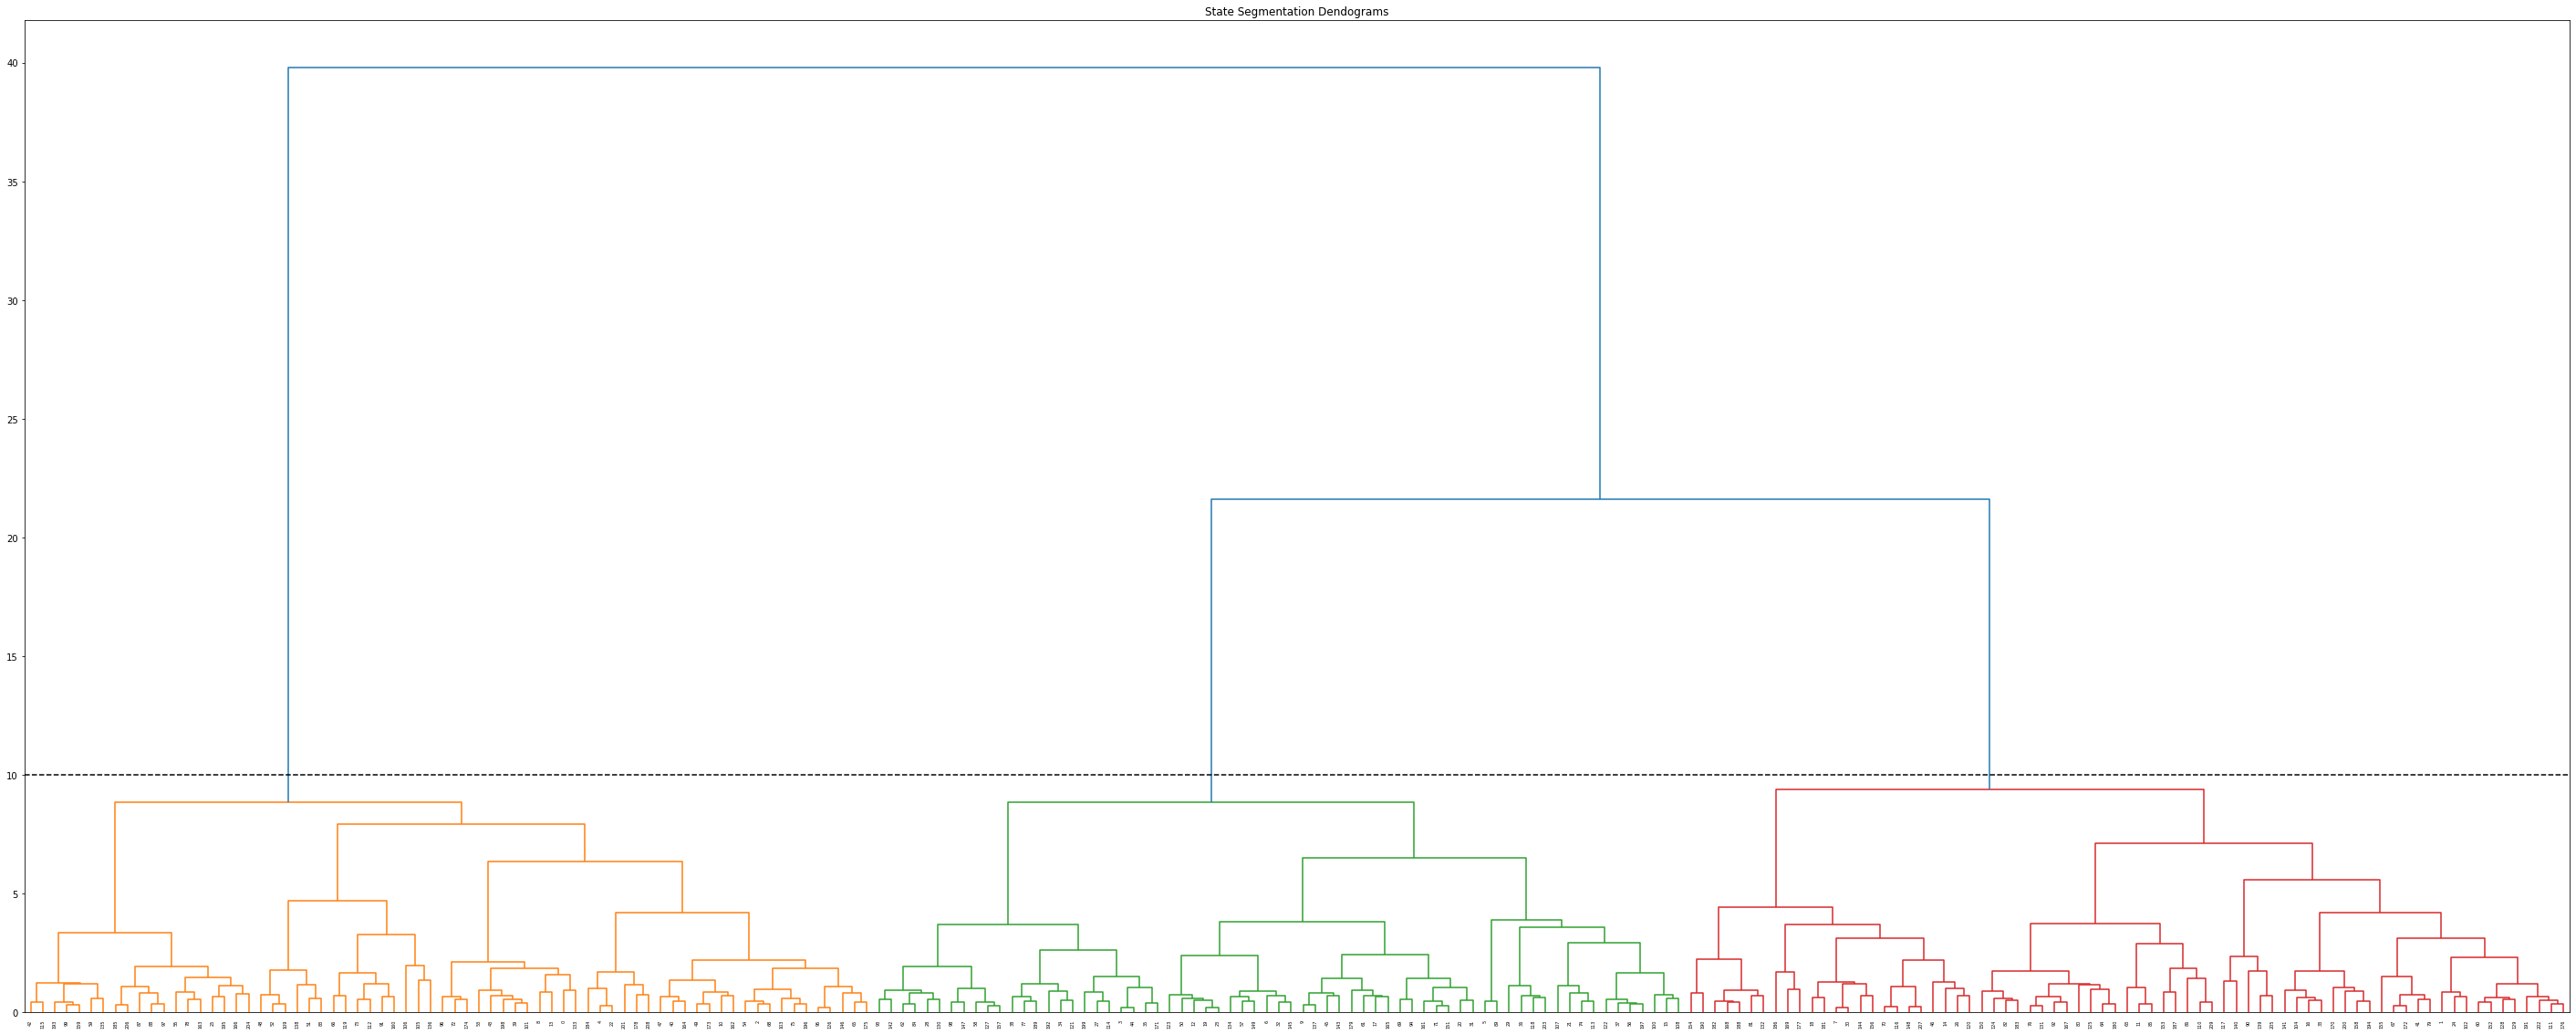

In [20]:
plot.figure(figsize=(50, 20))
plot.title("State Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(bank_scaled, method='ward'),color_threshold=10)
plot.axhline(10, color='black', linestyle='--')
plot.show()

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

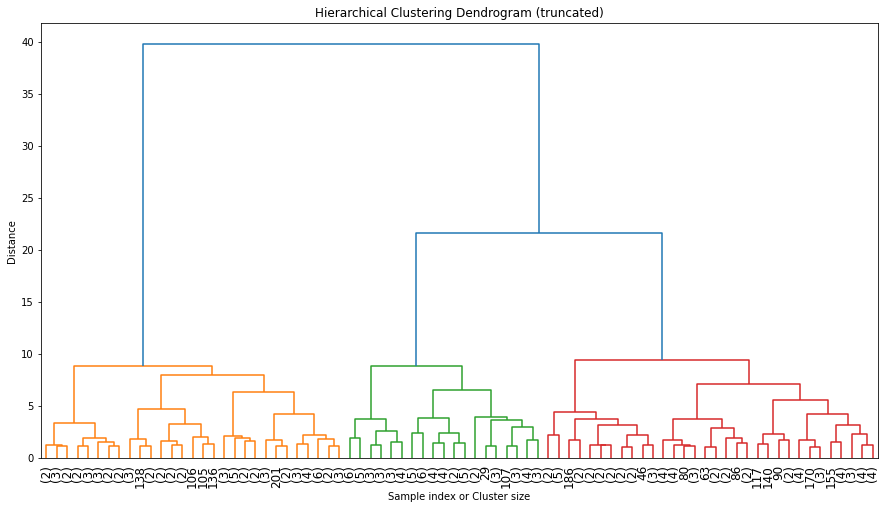

In [22]:
Z_Final = linkage(bank_scaled, 'ward', metric='euclidean')
plot.figure(figsize=(15,8))
plot.title('Hierarchical Clustering Dendrogram (truncated)')
plot.xlabel('Sample index or Cluster size')
plot.ylabel('Distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10
    
)
plot.show()

In [23]:
#Method 1 - f-cluster
x = shc.linkage(bank_scaled, method='ward')
clusters_f = shc.fcluster(x, 3, criterion='maxclust')
clusters_f

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [24]:
# x = shc.linkage(bank_scaled, method='average')
# clusters_f = shc.fcluster(x, 3, criterion='maxclust')
# clusters_f

In [25]:
#Method 2 - Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_agg = cluster.fit_predict(bank_scaled)
clusters_agg

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0], dtype=int64)

In [26]:
# from sklearn.cluster import AgglomerativeClustering

# cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
# clusters_agg = cluster.fit_predict(bank_scaled)
# clusters_agg

In [27]:
bank['cluster_f'] = clusters_f
bank['cluster_agg'] = clusters_agg
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_f,cluster_agg
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [28]:
df3 = bank.drop(['cluster_agg'], axis = 1)
df_clust_f = df3.groupby('cluster_f').mean()
cluster_f_freq = bank['cluster_f'].value_counts().sort_index()
df_clust_f['cluster count'] = cluster_f_freq
df_clust_f

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster count
cluster_f,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [29]:
df4 = bank.drop(['cluster_f'], axis = 1)
df_clust_agg = df4.groupby('cluster_agg').mean()
cluster_agg_freq = bank['cluster_agg'].value_counts().sort_index()
df_clust_agg['cluster count'] = cluster_agg_freq
df_clust_agg

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster count
cluster_agg,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67


### 1.4 K-means Clustering

In [4]:
norm.isf(3.064)

NameError: name 'norm' is not defined

In [30]:
from sklearn.cluster import KMeans

In [31]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(bank_scaled)
    wcss.append(kmeans.inertia_)

In [32]:
for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 659.1717544870411
The WSS value for 3 clusters is 430.65897315130064
The WSS value for 4 clusters is 371.301721277542
The WSS value for 5 clusters is 327.9608240079031
The WSS value for 6 clusters is 290.5900305968219
The WSS value for 7 clusters is 264.83153087478144
The WSS value for 8 clusters is 240.6837259501598
The WSS value for 9 clusters is 220.85285825594738
The WSS value for 10 clusters is 206.3829103601579


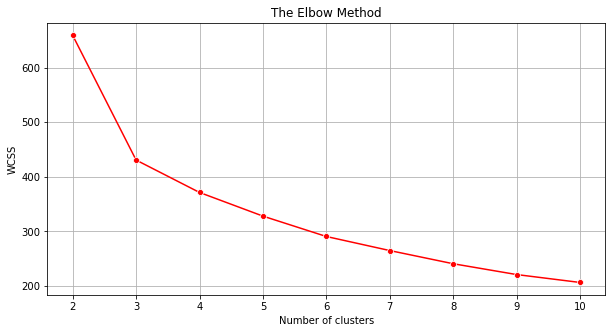

In [33]:
plot.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plot.title('The Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.grid()
plot.show()

In [34]:
k_means = KMeans(n_clusters = 3, random_state = 1)
k_means.fit(bank_scaled)
labels_3 = k_means.labels_
labels_3

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [35]:
# # For 4 cluster
k_means = KMeans(n_clusters = 4, random_state = 1)
k_means.fit(bank_scaled)
labels_4 = k_means.labels_
labels_4

array([1, 0, 1, 3, 1, 3, 3, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3,
       1, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 1,
       1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 0, 3, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 0, 1,
       2, 0, 1, 3, 3, 2, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0,
       0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 0, 1, 1, 1,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 1, 0, 2, 1, 3,
       1, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2])

In [36]:
bank['kmeans_cluster_4']= labels_4
bank['kmeans_cluster_3']= labels_3
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_f,cluster_agg,kmeans_cluster_4,kmeans_cluster_3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,3,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1,1


In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
silhouette_score(bank_scaled, labels_3, random_state = 1)

0.4007270552751298

In [39]:
sil_width = silhouette_samples(bank_scaled, labels_3)
sil_width

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [40]:
df_kmeans_3 = bank.drop(['cluster_f','cluster_agg','kmeans_cluster_4'], axis = 1)
df_kclust_3 = df_kmeans_3.groupby('kmeans_cluster_3').mean()
cluster_3_freq = bank['kmeans_cluster_3'].value_counts().sort_index()
df_kclust_3['cluster count'] = cluster_3_freq
df_kclust_3

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster count
kmeans_cluster_3,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


## Problem 2

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
insurance = pd.read_csv(r"C:\Users\Akshay\Desktop\intro to phython\machine learning\project ml\insurance_part2_data.csv")

In [43]:
insurance.head(2)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.7,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.0,Online,34,20.00,Customised Plan,ASIA


In [44]:
insurance.tail(3)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [45]:
insurance.shape

(3000, 10)

In [46]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [47]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [48]:
insurance.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [49]:
insurance.describe(include = 'all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [50]:
dups = insurance.duplicated()
print("The number of duplicated rows is %d" %(dups.sum()))
insurance[dups]

The number of duplicated rows is 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [51]:
ins = insurance.copy()
ins

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [52]:
ins.drop_duplicates(inplace = True)

In [53]:
ins

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [54]:
ins.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [55]:
(ins['Claimed'] == 'Yes').sum()

914

In [56]:
ins['Type'].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [57]:
ins[(ins['Claimed'] == 'Yes') & (ins['Type'] == 'Travel Agency')]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
32,36,EPX,Travel Agency,Yes,0.00,Online,16,42.00,Customised Plan,ASIA
34,25,EPX,Travel Agency,Yes,0.00,Offline,20,37.00,Customised Plan,Americas
40,30,CWT,Travel Agency,Yes,16.25,Online,5,25.00,Gold Plan,ASIA
43,39,EPX,Travel Agency,Yes,0.00,Online,3,20.00,Customised Plan,ASIA
50,32,EPX,Travel Agency,Yes,0.00,Online,22,17.00,Cancellation Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2973,30,EPX,Travel Agency,Yes,0.00,Online,105,19.87,Customised Plan,ASIA
2974,36,EPX,Travel Agency,Yes,0.00,Online,28,10.00,Cancellation Plan,EUROPE
2985,34,EPX,Travel Agency,Yes,0.00,Online,34,19.00,Cancellation Plan,ASIA
2988,36,EPX,Travel Agency,Yes,0.00,Online,18,36.00,Customised Plan,ASIA


In [58]:
ins[(ins['Claimed'] == 'Yes') & (ins['Type'] == 'Airlines')]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
10,37,C2B,Airlines,Yes,46.96,Online,368,187.85,Silver Plan,ASIA
11,43,C2B,Airlines,Yes,15.88,Online,77,63.50,Silver Plan,ASIA
13,52,C2B,Airlines,Yes,5.88,Online,7,23.50,Bronze Plan,ASIA
15,39,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2983,25,C2B,Airlines,Yes,5.88,Online,8,23.50,Bronze Plan,ASIA
2987,16,C2B,Airlines,Yes,15.00,Online,15,60.00,Bronze Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA


In [59]:
ins['Product Name'].unique()

array(['Customised Plan', 'Cancellation Plan', 'Bronze Plan',
       'Silver Plan', 'Gold Plan'], dtype=object)

In [60]:
ins['Destination'].unique()

array(['ASIA', 'Americas', 'EUROPE'], dtype=object)

In [61]:
ins["Agency_Code"].unique()

array(['C2B', 'EPX', 'CWT', 'JZI'], dtype=object)

In [62]:
ins['Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [63]:
ins[(ins['Claimed'] == 'Yes') & (ins['Channel'] == 'Online')]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
10,37,C2B,Airlines,Yes,46.96,Online,368,187.85,Silver Plan,ASIA
11,43,C2B,Airlines,Yes,15.88,Online,77,63.50,Silver Plan,ASIA
13,52,C2B,Airlines,Yes,5.88,Online,7,23.50,Bronze Plan,ASIA
15,39,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2988,36,EPX,Travel Agency,Yes,0.00,Online,18,36.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas


In [64]:
ins

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


Skew -  1.103


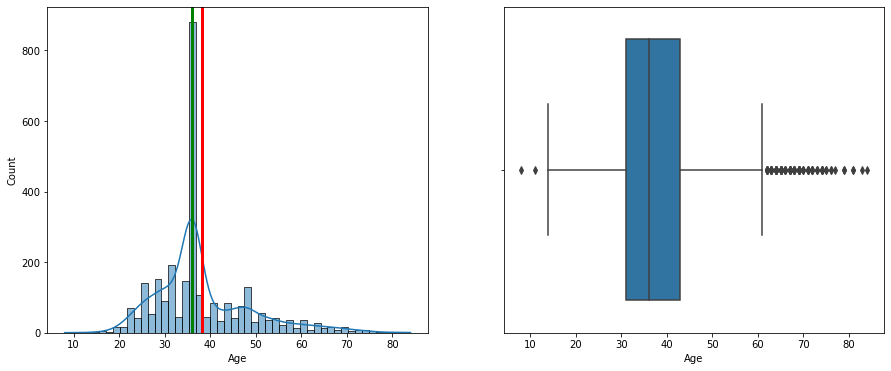

In [65]:
plot.figure(figsize=(15,6))
plot.subplot(1,2,1)
print('Skew - ', np.round(ins['Age'].skew(), 3))
sns.histplot(data = ins['Age'], bins = 50, kde = True)
plot.axvline(ins['Age'].mean(), ymin = 0, ymax = 900, color = 'red', linewidth = 3)
plot.axvline(ins['Age'].median(), ymin = 0, ymax = 900, color= 'green', linewidth = 3)
plot.subplot(1,2,2)
sns.boxplot(ins['Age'])
plot.show()

Skew -  3.105


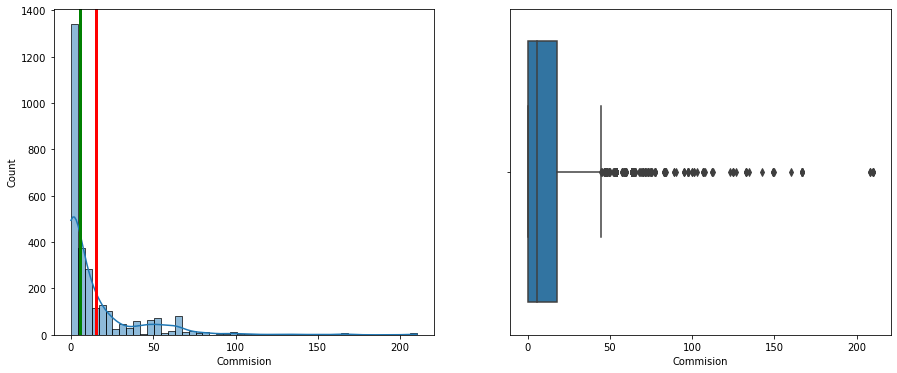

In [66]:
plot.figure(figsize=(15,6))
plot.subplot(1,2,1)
print('Skew - ', np.round(ins['Commision'].skew(), 3))
sns.histplot(data = ins['Commision'], bins = 50, kde = True)
plot.axvline(ins['Commision'].mean(), ymin = 0, ymax = 900, color = 'red', linewidth = 3)
plot.axvline(ins['Commision'].median(), ymin = 0, ymax = 900, color= 'green', linewidth = 3)
plot.subplot(1,2,2)
sns.boxplot(ins['Commision'])
plot.show()

Skew -  13.786


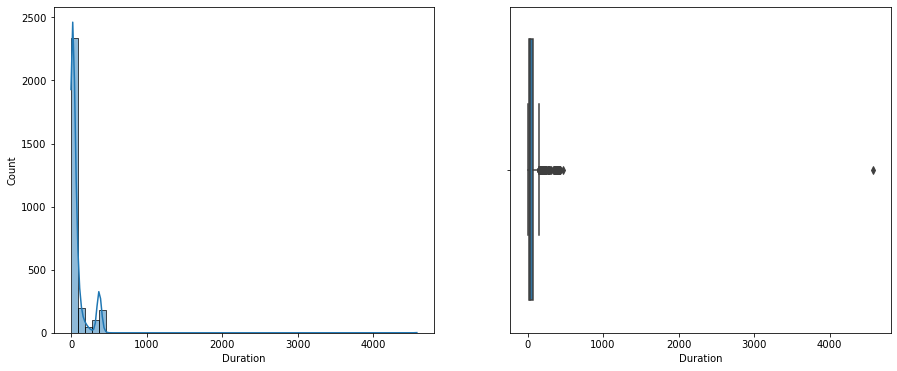

In [67]:
plot.figure(figsize=(15,6))
plot.subplot(1,2,1)
print('Skew - ', np.round(ins['Duration'].skew(), 3))
sns.histplot(data = ins['Duration'], bins = 50, kde = True)
plot.subplot(1,2,2)
sns.boxplot(ins['Duration'])
plot.show()

Skew -  2.345


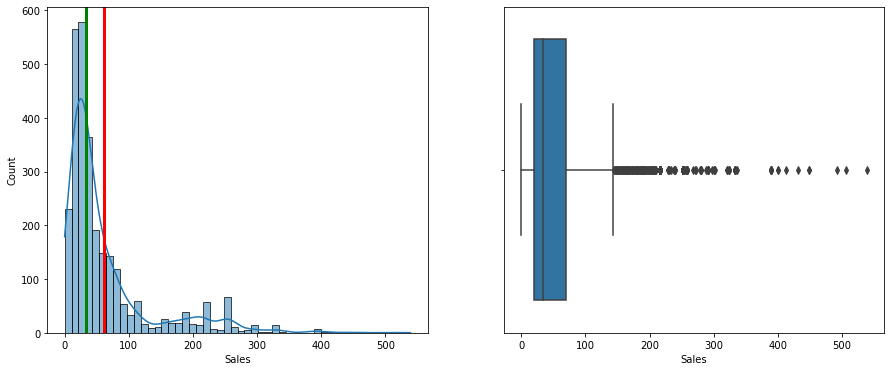

In [68]:
plot.figure(figsize=(15,6))
plot.subplot(1,2,1)
print('Skew - ', np.round(ins['Sales'].skew(), 3))
sns.histplot(data = ins['Sales'], bins = 50, kde = True)
plot.axvline(ins['Sales'].mean(), ymin = 0, ymax = 900, color = 'red', linewidth = 3)
plot.axvline(ins['Sales'].median(), ymin = 0, ymax = 900, color= 'green', linewidth = 3)
plot.subplot(1,2,2)
sns.boxplot(ins['Sales'])
plot.show()

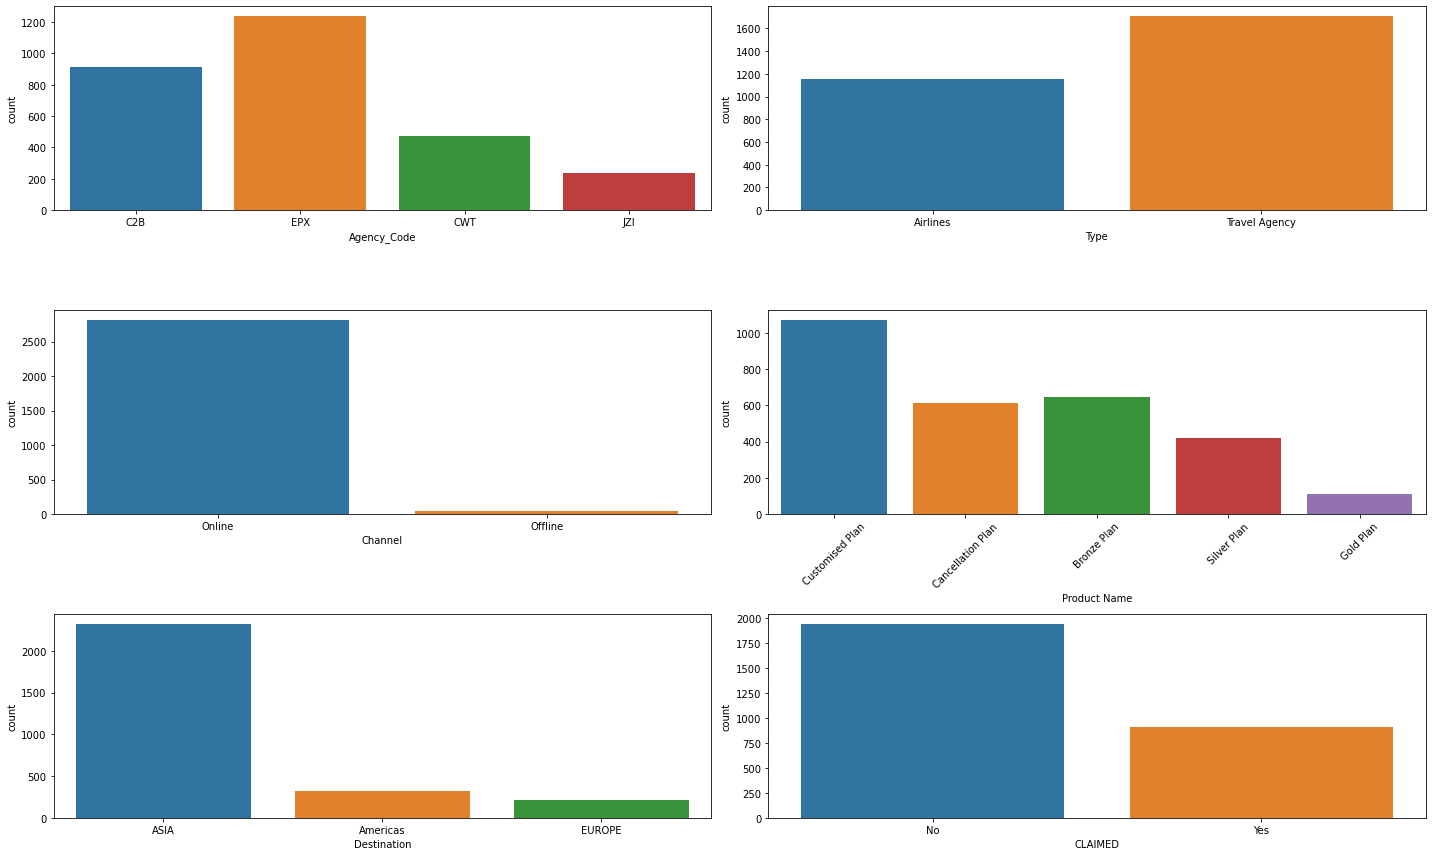

In [69]:
plot.figure(figsize=(20,12))
plot.subplot(321)
sns.countplot(ins['Agency_Code'])

plot.subplot(3,2,2)
sns.countplot(ins['Type'])

plot.subplot(323)
sns.countplot(ins['Channel'])

plot.subplot(3,2,4)
sns.countplot(ins['Product Name'])
plot.xticks(rotation = 45)

plot.subplot(325)
sns.countplot(ins['Destination'])

plot.subplot(326)
sns.countplot(ins['Claimed'])
plot.xlabel("CLAIMED")

plot.tight_layout()
plot.show()


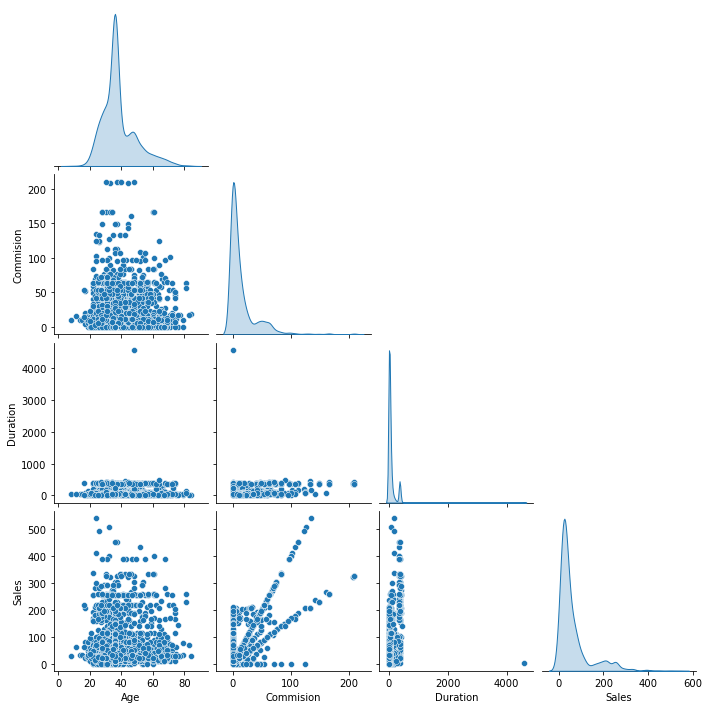

In [70]:
# Bi-variate Analysis

sns.pairplot(ins, diag_kind = 'kde', corner = True)

<AxesSubplot:>

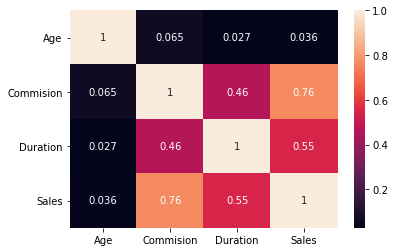

In [71]:
sns.heatmap(data = ins.corr(), annot = True)

## 2.2

In [72]:
df_Object = ins.drop("Claimed",axis=1)

In [73]:
# dummy = pd.get_dummies(df_Object, drop_first = False)
# dummy.head().T

In [74]:
# dummy.shape

In [75]:
#dummy.info()

In [76]:
for feature in df_Object.columns: 
    if df_Object[feature].dtype == 'object': 
        df_Object[feature] = pd.Categorical(df_Object[feature]).codes

In [77]:
df_Object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Commision     2861 non-null   float64
 4   Channel       2861 non-null   int8   
 5   Duration      2861 non-null   int64  
 6   Sales         2861 non-null   float64
 7   Product Name  2861 non-null   int8   
 8   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 190.3 KB


In [78]:
df_Object['Claimed'] = ins['Claimed']

In [79]:
X = df_Object.drop("Claimed", axis = 1)
Y = df_Object.Claimed

In [80]:
# Splitting the data into train and test attributes

from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.70, stratify = Y, random_state = 1)

In [82]:
print("X-train :", X_train.shape)
print("X-test  :", X_test.shape)

X-train : (2002, 9)
X-test  : (859, 9)


## Build Classification Model CART - Decision Tree.

In [84]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [85]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [86]:
pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)

,Imp
Age,0.174391
Agency_Code,0.170733
Type,0.005534
Commision,0.088374
Channel,0.001797
Duration,0.256187
Sales,0.241372
Product Name,0.033251
Destination,0.028361


In [87]:
y_predict = dt_model.predict(X_test)

In [88]:
#accuracy score for actual and predicted train data
dt_model.score(X_train, Y_train)

0.993006993006993

In [89]:
#accuracy scoe for actual and predicted test data labels.
dt_model.score(X_test, Y_test)

0.6926658905704307

#### A clear case of under-fitting can be observed. We prun the model using Grid_search

In [93]:
para = {'criterion':['gini', 'entropy'],
         'max_depth':[5,7,9,11,13,15],
          'min_samples_split':list(range(1,20)),
         "min_samples_leaf":list(range(1,20))}

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid = para, refit = True, verbose = 1)
grid_dt.fit(X_train, Y_train)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [96]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 14,
 'min_samples_split': 4}

In [97]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5 ,min_samples_leaf = 14, min_samples_split = 4)
reg_dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=14,
                       min_samples_split=4)

In [98]:
pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).T

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
Imp,0.174391,0.170733,0.005534,0.088374,0.001797,0.256187,0.241372,0.033251,0.028361


In [99]:
pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).T

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
Imp,0.019496,0.464445,0.0,0.066766,0.0,0.016478,0.289412,0.134561,0.008843


In [100]:
ytrain_predict = reg_dt_model.predict(X_train)

ytest_predict = reg_dt_model.predict(X_test)

#### Train Accuracy

In [101]:
reg_dt_model.score(X_train, Y_train)

0.7867132867132867

#### Test Accuracy

In [102]:
reg_dt_model.score(X_test, Y_test)

0.7520372526193247

#### classification report for train set

In [104]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1362
         Yes       0.68      0.63      0.65       640

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



#### classification report for test set

In [105]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

          No       0.82      0.81      0.82       585
         Yes       0.61      0.62      0.62       274

    accuracy                           0.75       859
   macro avg       0.72      0.72      0.72       859
weighted avg       0.75      0.75      0.75       859



#### confusion_matrix for training data

<AxesSubplot:>

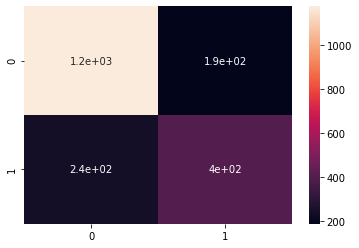

In [106]:
sns.heatmap(confusion_matrix(Y_train, ytrain_predict), annot = True)

#### confusion_matrix for test

<AxesSubplot:>

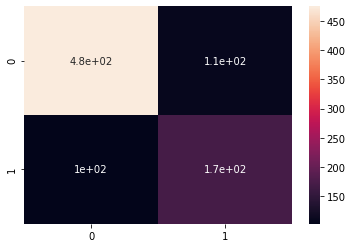

In [107]:
sns.heatmap(confusion_matrix(Y_test, ytest_predict), annot = True)

### Building a basic Random Forest model with random_state=1. Check out the accuracy (model score) on the training and test data.

In [108]:
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(X_train, Y_train)

In [109]:
rfcl.score(X_train, Y_train)

0.993006993006993

In [110]:
rfcl.score(X_test, Y_test)

0.7532013969732246

In [111]:
y_train_pred = rfcl.predict(X_train)

y_test_pred = rfcl.predict(X_test)

#### confusion_matrix for training data before pruning

<AxesSubplot:>

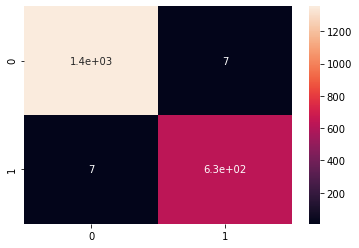

In [112]:
sns.heatmap(confusion_matrix(Y_train, y_train_pred), annot = True)

#### confusion_matrix for test data before pruning

<AxesSubplot:>

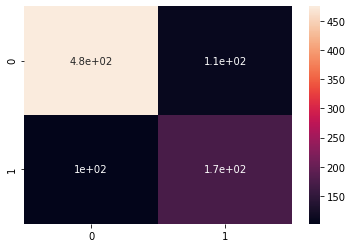

In [113]:
sns.heatmap(confusion_matrix(Y_test, y_test_pred), annot = True)

### Building Random Forest with n_estimators = 501, random_state=1 and do GridSearchCV

In [114]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state = 1)

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'max_features': [4, 5, 6, 7],
    'min_samples_leaf': [10, 30, 50, 100],
    'min_samples_split': [20, 30, 50],
    'n_estimators': [251, 301, 501, 631]
}

rfcl = RandomForestClassifier(random_state = 1)

In [116]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [117]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [10, 30, 50, 100],
                         'min_samples_split': [20, 30, 50],
                         'n_estimators': [251, 301, 501, 631]})

In [118]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 301}

In [119]:
best_grid = grid_search.best_estimator_

In [120]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

### Checking the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix for the Random Forest model with the best parameters

#### Train Accuracy

In [121]:
best_grid.score(X_train, Y_train)

0.7957042957042957

#### Test Accuracy

In [122]:
best_grid.score(X_test, Y_test)

0.7823050058207218

#### Classification report for train set

In [124]:
print(classification_report(Y_train, y_train_predict))

              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1362
         Yes       0.72      0.59      0.65       640

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



#### Classification report for test set

In [125]:
print(classification_report(Y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.83      0.85      0.84       585
         Yes       0.67      0.63      0.65       274

    accuracy                           0.78       859
   macro avg       0.75      0.74      0.75       859
weighted avg       0.78      0.78      0.78       859



#### confusion_matrix for training data

<AxesSubplot:>

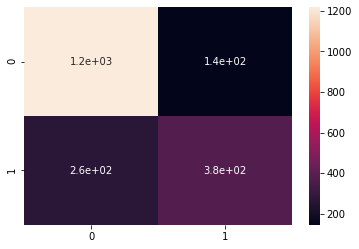

In [126]:
sns.heatmap(confusion_matrix(Y_train, y_train_predict), annot = True)


#### confusion_matrix for test data

<AxesSubplot:>

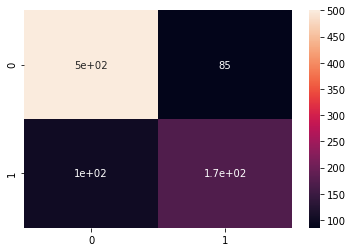

In [127]:
sns.heatmap(confusion_matrix(Y_test, y_test_predict),annot = True)

## Model Comparision

#### Comparing Accuracies from all the models for Train and Test Sets.

In [128]:
models=[reg_dt_model,best_grid]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
for i in range(0, len(models)):
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(Y_train, models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(Y_test, models[i].predict(X_test)),2)))      

Accuracy Score for Train set for DecisionTreeClassifier is 0.79
Accuracy Score for Test set for DecisionTreeClassifier is 0.75
Accuracy Score for Train set for RandomForestClassifier is 0.8
Accuracy Score for Test set for RandomForestClassifier is 0.78


In [140]:
# print("Decision Tree TRAIN prediction Report")
# print("-----------------------------------------")
# dt_metrics = classification_report(Y_train, ytrain_predict, output_dict = True)
# dt = pd.DataFrame(dt_metrics).transpose()
# dt_test_precision = round(dt.iloc[1][0], 2)
# dt_test_recall = round(dt.iloc[1][1], 2)
# dt_test_f1 = round(dt.iloc[1][2], 2)
# print ('dt_test_precision ',dt_test_precision)
# print ('dt_test_recall    ',dt_test_recall)
# print ('dt_test_f1        ',dt_test_f1)

# print("==========================================")

# print("Randon Forest TRAIN prediction Report")
# print("------------------------------------------")
# rf_metrics = classification_report(Y_train, y_train_predict, output_dict = True)
# df = pd.DataFrame(rf_metrics).transpose()
# df
# rf_test_precision = round(df.iloc[1][0], 2)
# rf_test_recall = round(df.iloc[1][1], 2)
# rf_test_f1 = round(df.iloc[1][2], 2)
# print ('rf_test_precision ',rf_test_precision)
# print ('rf_test_recall    ',rf_test_recall)
# print ('rf_test_f1        ',rf_test_f1)

Decision Tree TRAIN prediction Report
-----------------------------------------
dt_test_precision  0.68
dt_test_recall     0.63
dt_test_f1         0.65
Randon Forest TRAIN prediction Report
------------------------------------------
rf_test_precision  0.72
rf_test_recall     0.59
rf_test_f1         0.65


In [139]:
# print("Decision Tree TEST prediction Report")
# print("-----------------------------------------")
# dt_metrics = classification_report(Y_test, ytest_predict, output_dict = True)
# dt = pd.DataFrame(dt_metrics).transpose()
# dt_test_precision = round(dt.iloc[1][0], 2)
# dt_test_recall = round(dt.iloc[1][1], 2)
# dt_test_f1 = round(dt.iloc[1][2], 2)
# print ('dt_test_precision ',dt_test_precision)
# print ('dt_test_recall    ',dt_test_recall)
# print ('dt_test_f1        ',dt_test_f1)

# print("==========================================")

# print("Randon Forest TEST prediction Report")
# print("------------------------------------------")
# rf_metrics = classification_report(Y_test, y_test_predict, output_dict = True)
# df = pd.DataFrame(rf_metrics).transpose()
# df
# rf_test_precision = round(df.iloc[1][0], 2)
# rf_test_recall = round(df.iloc[1][1], 2)
# rf_test_f1 = round(df.iloc[1][2], 2)
# print ('rf_test_precision ',rf_test_precision)
# print ('rf_test_recall    ',rf_test_recall)
# print ('rf_test_f1        ',rf_test_f1)

Decision Tree TEST prediction Report
-----------------------------------------
dt_test_precision  0.61
dt_test_recall     0.62
dt_test_f1         0.62
Randon Forest TEST prediction Report
------------------------------------------
rf_test_precision  0.67
rf_test_recall     0.63
rf_test_f1         0.65


In [146]:
print("Decision Tree TRAIN classification report")
print("---------------------------------------------------------")
print(classification_report(Y_train, ytrain_predict))
print("=========================================================")
print("Random Forest TRAIN classification report")
print(classification_report(Y_train, y_train_predict))

print("*********************************************************")

print("Decision Tree TEST classification report")
print("----------------------------------------------------------")
dt_metrics = classification_report(Y_test, ytest_predict, output_dict = True)
dt = pd.DataFrame(dt_metrics).transpose()
print(dt)
print("===========================================================")
print("Random Forest classification TEST report")
rf_metrics = classification_report(Y_test, y_test_predict, output_dict = True)
rf = pd.DataFrame(rf_metrics).transpose()
print(rf)

Decision Tree TRAIN classification report
---------------------------------------------------------
              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1362
         Yes       0.68      0.63      0.65       640

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002

Random Forest TRAIN classification report
              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1362
         Yes       0.72      0.59      0.65       640

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002

*********************************************************
Decision Tree TEST classification report
----------------------------------------------------------
              precision    recall  f1-score   

#### Comparing Confusion Matrices from All the models for the Train Set

Confusion matrix for Predictions on Train set


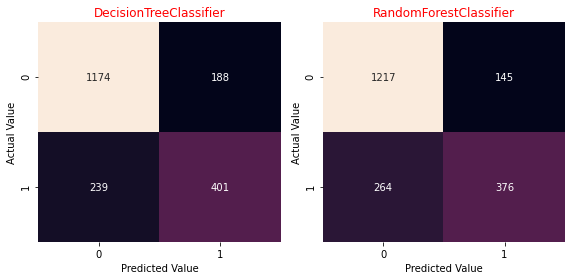

In [147]:
print("Confusion matrix for Predictions on Train set")

models = [reg_dt_model,best_grid]
models_names = {reg_dt_model:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
fig=plot.figure(figsize=(12,4))

for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(Y_train, models[i].predict(X_train)), annot = True, fmt = '.0f', cbar = False)
    ax.set_title(models_names[models[i]],color='Red')
    plot.ylabel('Actual Value')
    plot.xlabel('Predicted Value')
    
plot.tight_layout()

#### Comparing Confusion Matrices from All the models for the Test Set.

Confusion Matrix or Predictions on Test set'


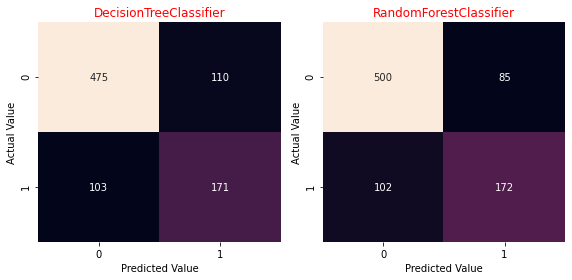

In [148]:
print("Confusion Matrix or Predictions on Test set'")
models = [reg_dt_model,best_grid]
models_names = {reg_dt_model:'DecisionTreeClassifier', best_grid:'RandomForestClassifier'}
fig=plot.figure(figsize=(12,4))

for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(Y_test, models[i].predict(X_test)), annot = True, fmt = '.0f', cbar = False)
    ax.set_title(models_names[models[i]], color = 'Red')
    plot.ylabel('Actual Value')
    plot.xlabel('Predicted Value')
plot.tight_layout()